In [ ]:
#week2.2 Decision Trees and Random Forests

In [199]:
#importing the necessary libraries
#pandas, for dtaset handling
import pandas as pd
#sklearn, for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn import tree
#matplotlib and seaborn, for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import the dataset
loan = pd.read_csv("Datasets/Kaggle/Loan/test.csv")

In [9]:
#dataset inspection
#printing the dataframe
print(loan)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

In [109]:
#no of dupes
print(loan.duplicated().sum())

0


In [11]:
#there seem to be null entries
#looking for null entries
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


(array([ 59.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 279.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

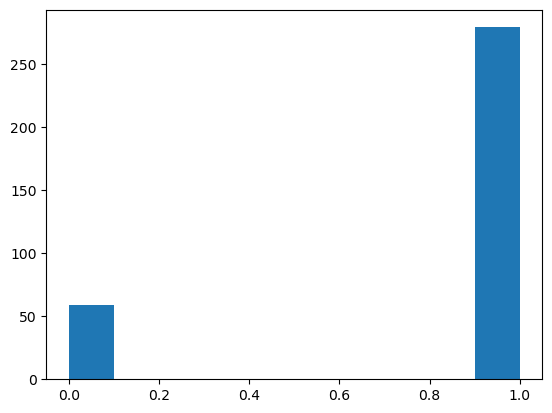

In [37]:
#there are quite a few null entries
#credit history has the most null values
#plotting it
plt.hist(loan["Credit_History"])

(array([  3.,   4.,   1.,  22.,   4.,   0.,   7., 312.,   0.,   8.]),
 array([  6. ,  53.4, 100.8, 148.2, 195.6, 243. , 290.4, 337.8, 385.2,
        432.6, 480. ]),
 <BarContainer object of 10 artists>)

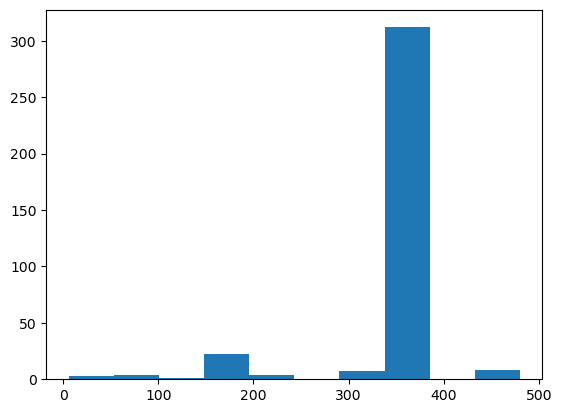

In [61]:

#plotting Loan_Amount_Term
plt.hist(loan["Loan_Amount_Term"])

In [55]:
#deleting Credit_History nulls since it has the most unknown values
loan1 = loan.dropna(subset = ["Credit_History"])

In [57]:
print(loan1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            338 non-null    object 
 1   Gender             327 non-null    object 
 2   Married            338 non-null    object 
 3   Dependents         330 non-null    object 
 4   Education          338 non-null    object 
 5   Self_Employed      316 non-null    object 
 6   ApplicantIncome    338 non-null    int64  
 7   CoapplicantIncome  338 non-null    int64  
 8   LoanAmount         333 non-null    float64
 9   Loan_Amount_Term   333 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      338 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.3+ KB
None


In [81]:
loan2 = loan1.copy()
#using mean fill on Loan_Amount
loan2['LoanAmount'] = loan1['LoanAmount'].fillna(loan1['LoanAmount'].mean())

In [83]:
print(loan1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            338 non-null    object 
 1   Gender             327 non-null    object 
 2   Married            338 non-null    object 
 3   Dependents         330 non-null    object 
 4   Education          338 non-null    object 
 5   Self_Employed      316 non-null    object 
 6   ApplicantIncome    338 non-null    int64  
 7   CoapplicantIncome  338 non-null    int64  
 8   LoanAmount         338 non-null    float64
 9   Loan_Amount_Term   333 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      338 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.3+ KB
None


In [101]:
#using mode fill on Loan_Amount_Term
loan2['Loan_Amount_Term'] = loan1['Loan_Amount_Term'].fillna(loan1['Loan_Amount_Term'].mode()[0])
#using mode fill on Dependents
loan2['Dependents'] = loan1['Dependents'].fillna(loan1['Dependents'].mode()[0])
#using mode fill on Gender
loan2['Gender'] = loan1['Gender'].fillna(loan1['Gender'].mode()[0])
#using mode fill on Self_Employed
loan2['Self_Employed'] = loan1['Self_Employed'].fillna(loan1['Self_Employed'].mode()[0])
print(loan2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            338 non-null    object 
 1   Gender             338 non-null    object 
 2   Married            338 non-null    object 
 3   Dependents         338 non-null    object 
 4   Education          338 non-null    object 
 5   Self_Employed      338 non-null    object 
 6   ApplicantIncome    338 non-null    int64  
 7   CoapplicantIncome  338 non-null    int64  
 8   LoanAmount         338 non-null    float64
 9   Loan_Amount_Term   338 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      338 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.3+ KB
None


In [105]:
#loan id is not a useful var
loan3 = loan2.drop(columns=['Loan_ID'])
print(loan3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             338 non-null    object 
 1   Married            338 non-null    object 
 2   Dependents         338 non-null    object 
 3   Education          338 non-null    object 
 4   Self_Employed      338 non-null    object 
 5   ApplicantIncome    338 non-null    int64  
 6   CoapplicantIncome  338 non-null    int64  
 7   LoanAmount         338 non-null    float64
 8   Loan_Amount_Term   338 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      338 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB
None


In [117]:
#encoding the categorical columns
label_encoder = LabelEncoder()
loan3['Gender'] = label_encoder.fit_transform(loan3['Gender'])
loan3['Married'] = label_encoder.fit_transform(loan3['Married'])
loan3['Dependents'] = label_encoder.fit_transform(loan3['Dependents'])
loan3['Education'] = label_encoder.fit_transform(loan3['Education'])
loan3['Self_Employed'] = label_encoder.fit_transform(loan3['Self_Employed'])
loan3['Property_Area'] = label_encoder.fit_transform(loan3['Property_Area'])
print(loan3)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           0          0              0             5720   
1         1        1           1          0              0             3076   
2         1        1           2          0              0             5000   
4         1        0           0          1              0             3276   
5         1        1           0          1              1             2165   
..      ...      ...         ...        ...            ...              ...   
361       1        1           1          0              0             2269   
362       1        1           3          1              1             4009   
363       1        1           0          0              0             4158   
365       1        1           0          0              0             5000   
366       1        0           0          0              1             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

<Axes: >

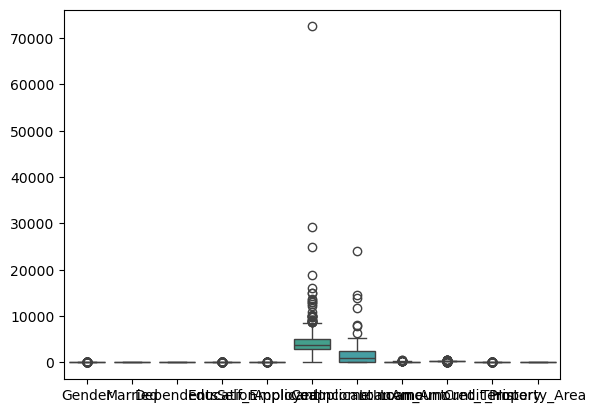

In [125]:
#outlier inspection
sns.boxplot(loan3)

In [131]:
print(loan3.describe())

           Gender     Married  Dependents   Education  Self_Employed  \
count  338.000000  338.000000  338.000000  338.000000     338.000000   
mean     0.810651    0.644970    0.798817    0.233728       0.103550   
std      0.392367    0.479232    1.053917    0.423828       0.305128   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    2.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       338.000000         338.000000  338.000000        338.000000   
mean       4787.251479        1525.680473  136.399399        342.236686   
std        4836.435745        2281.046544   58.093138         66.381084   
min           0.000000           0.000000   28.0000

<Axes: >

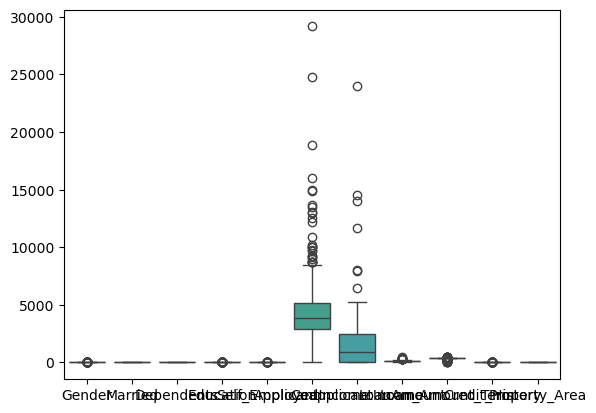

In [139]:
#use boolean indexing to remove the 70k+ income, as it may mess with our model
loan4 = loan3[loan3['ApplicantIncome'] != 72529]
#outlier inspection
sns.boxplot(loan4)

In [141]:
#seems more usable

In [151]:
#Making decision tree
#indep var
X = loan4.drop(columns=['Loan_Amount_Term'])
#dep var
y = loan4['Loan_Amount_Term']
print(X)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           0          0              0             5720   
1         1        1           1          0              0             3076   
2         1        1           2          0              0             5000   
4         1        0           0          1              0             3276   
5         1        1           0          1              1             2165   
..      ...      ...         ...        ...            ...              ...   
361       1        1           1          0              0             2269   
362       1        1           3          1              1             4009   
363       1        1           0          0              0             4158   
365       1        1           0          0              0             5000   
366       1        0           0          0              1             9200   

     CoapplicantIncome  LoanAmount  Credit_History 

In [157]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
print(y_pred)
print(y_train)

[360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 480. 360. 480. 360. 360. 480.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 180. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 300. 360. 360. 360. 360. 360. 360. 360. 360. 360. 180. 360. 360. 360.
 360. 360. 360. 360.]
17     360.0
7      360.0
252    360.0
295    480.0
101    480.0
       ...  
205    360.0
76     360.0
116    360.0
293    360.0
111    360.0
Name: Loan_Amount_Term, Length: 235, dtype: float64


In [185]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy* 100:.2f}%')
# Calculate recall
recall = recall_score(y_test, y_pred, average = 'weighted')
print(f'Recall: {recall* 100:.2f}%')
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 78.43%
Recall: 78.43%
Confusion Matrix:
[[ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  2  1]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  1  0 79  2]
 [ 0  0  0  0  0  0  0  3  0]]


In [163]:
# Initialize the Random Forest Classifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf2.fit(X_train, y_train)

# Predict on the test data
y2_pred = clf2.predict(X_test)
print(y2_pred)
print(y_train)

[360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.
 360. 360. 360. 360.]
17     360.0
7      360.0
252    360.0
295    480.0
101    480.0
       ...  
205    360.0
76     360.0
116    360.0
293    360.0
111    360.0
Name: Loan_Amount_Term, Length: 235, dtype: float64


In [187]:

#accuracy
accuracy2 = accuracy_score(y_test, y2_pred)
print(f'Accuracy2: {accuracy2* 100:.2f}%')
# Calculate recall
recall2 = recall_score(y_test, y2_pred, average = 'weighted')
print(f'Recall2: {recall2* 100:.2f}%')
# Confusion matrix
conf_matrix2 = confusion_matrix(y_test, y2_pred)
print(f'Confusion Matrix2:\n{conf_matrix2}')

Accuracy2: 81.37%
Recall2: 81.37%
Confusion Matrix2:
[[ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0  3  0]]


In [189]:
#got a better performance

In [193]:
#F1 score for DecTree
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

F1 Score: 0.73


In [195]:
#F1 score for RanForest
f12 = f1_score(y_test, y2_pred, average='weighted')

print(f"F1 Score2: {f12:.2f}")

F1 Score2: 0.73


In [197]:
#same f1 score

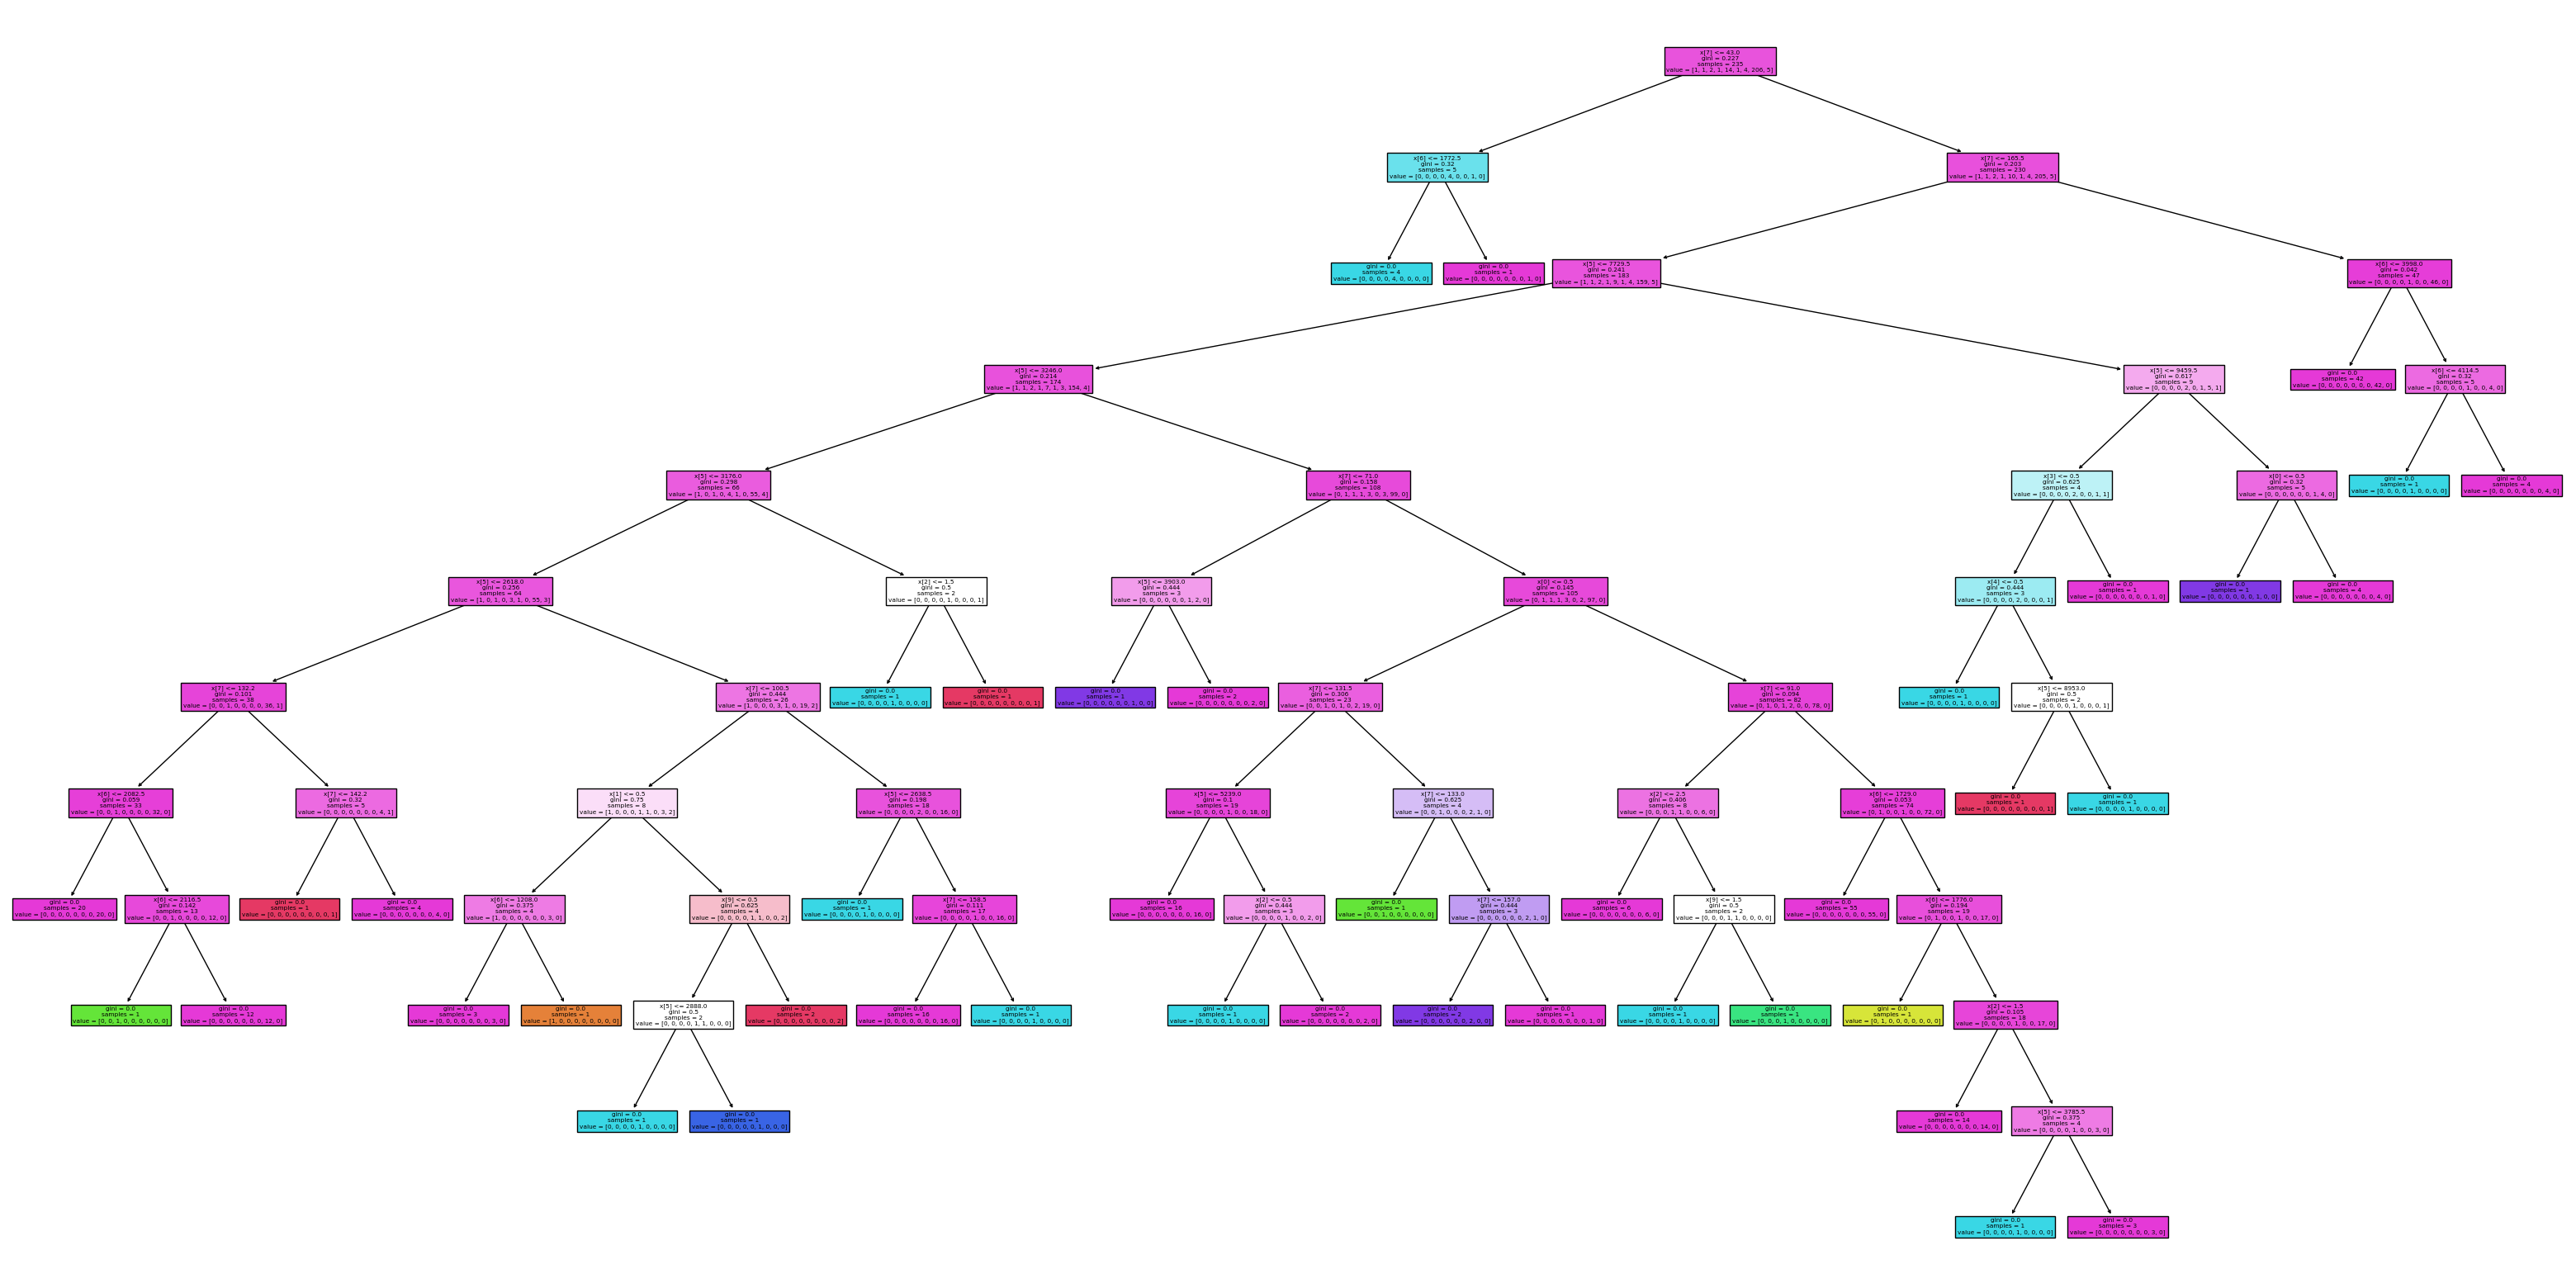

In [217]:
# Plot the decision tree
plt.figure(figsize=(40, 20))
plot_tree(clf, filled=True)
plt.savefig('decision_tree.png')
plt.show()

In [203]:
plt.savefig('decision_tree.png')

<Figure size 640x480 with 0 Axes>